In [155]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

# Exploratory Data Analysis

In [103]:
# setting seaborn theme
sb.set_theme()

In [104]:
# reading in the datasets
training_data = pd.read_csv("customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [105]:
# inspecting shape of training data
training_data.shape

(440833, 12)

In [106]:
# creating nicer column headers
training_data.columns = [col.lower().replace(" ", "_") for col in  training_data.columns]
test_data.columns = training_data.columns

training_data.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [107]:
training_data.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [108]:
training_data.dtypes

customerid           float64
age                  float64
gender                object
tenure               float64
usage_frequency      float64
support_calls        float64
payment_delay        float64
subscription_type     object
contract_length       object
total_spend          float64
last_interaction     float64
churn                float64
dtype: object

In [109]:
# observing distribution of target variable
training_data.churn.value_counts()

1.0    249999
0.0    190833
Name: churn, dtype: int64

In [110]:
training_data.churn.value_counts()/training_data.shape[0]

1.0    0.567106
0.0    0.432892
Name: churn, dtype: float64

In [111]:
test_data.churn.value_counts()

0    33881
1    30493
Name: churn, dtype: int64

In [112]:
test_data.churn.value_counts()/test_data.shape[0]

0    0.526315
1    0.473685
Name: churn, dtype: float64

In [113]:
# dropping any rows with missing values
training_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# isolating target from input features
target = training_data.churn
features = training_data.iloc[:,1:-1] # removed customerid and churn

test_target = test_data.churn
test_features = test_data.iloc[:,1:-1] # removed customerid and churn

In [114]:
features.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0


## Visualizing Distributions of Input Features

In [115]:
features.dtypes

age                  float64
gender                object
tenure               float64
usage_frequency      float64
support_calls        float64
payment_delay        float64
subscription_type     object
contract_length       object
total_spend          float64
last_interaction     float64
dtype: object

In [116]:
features["subscription_type"].value_counts(dropna=False)

Standard    149128
Premium     148678
Basic       143026
Name: subscription_type, dtype: int64

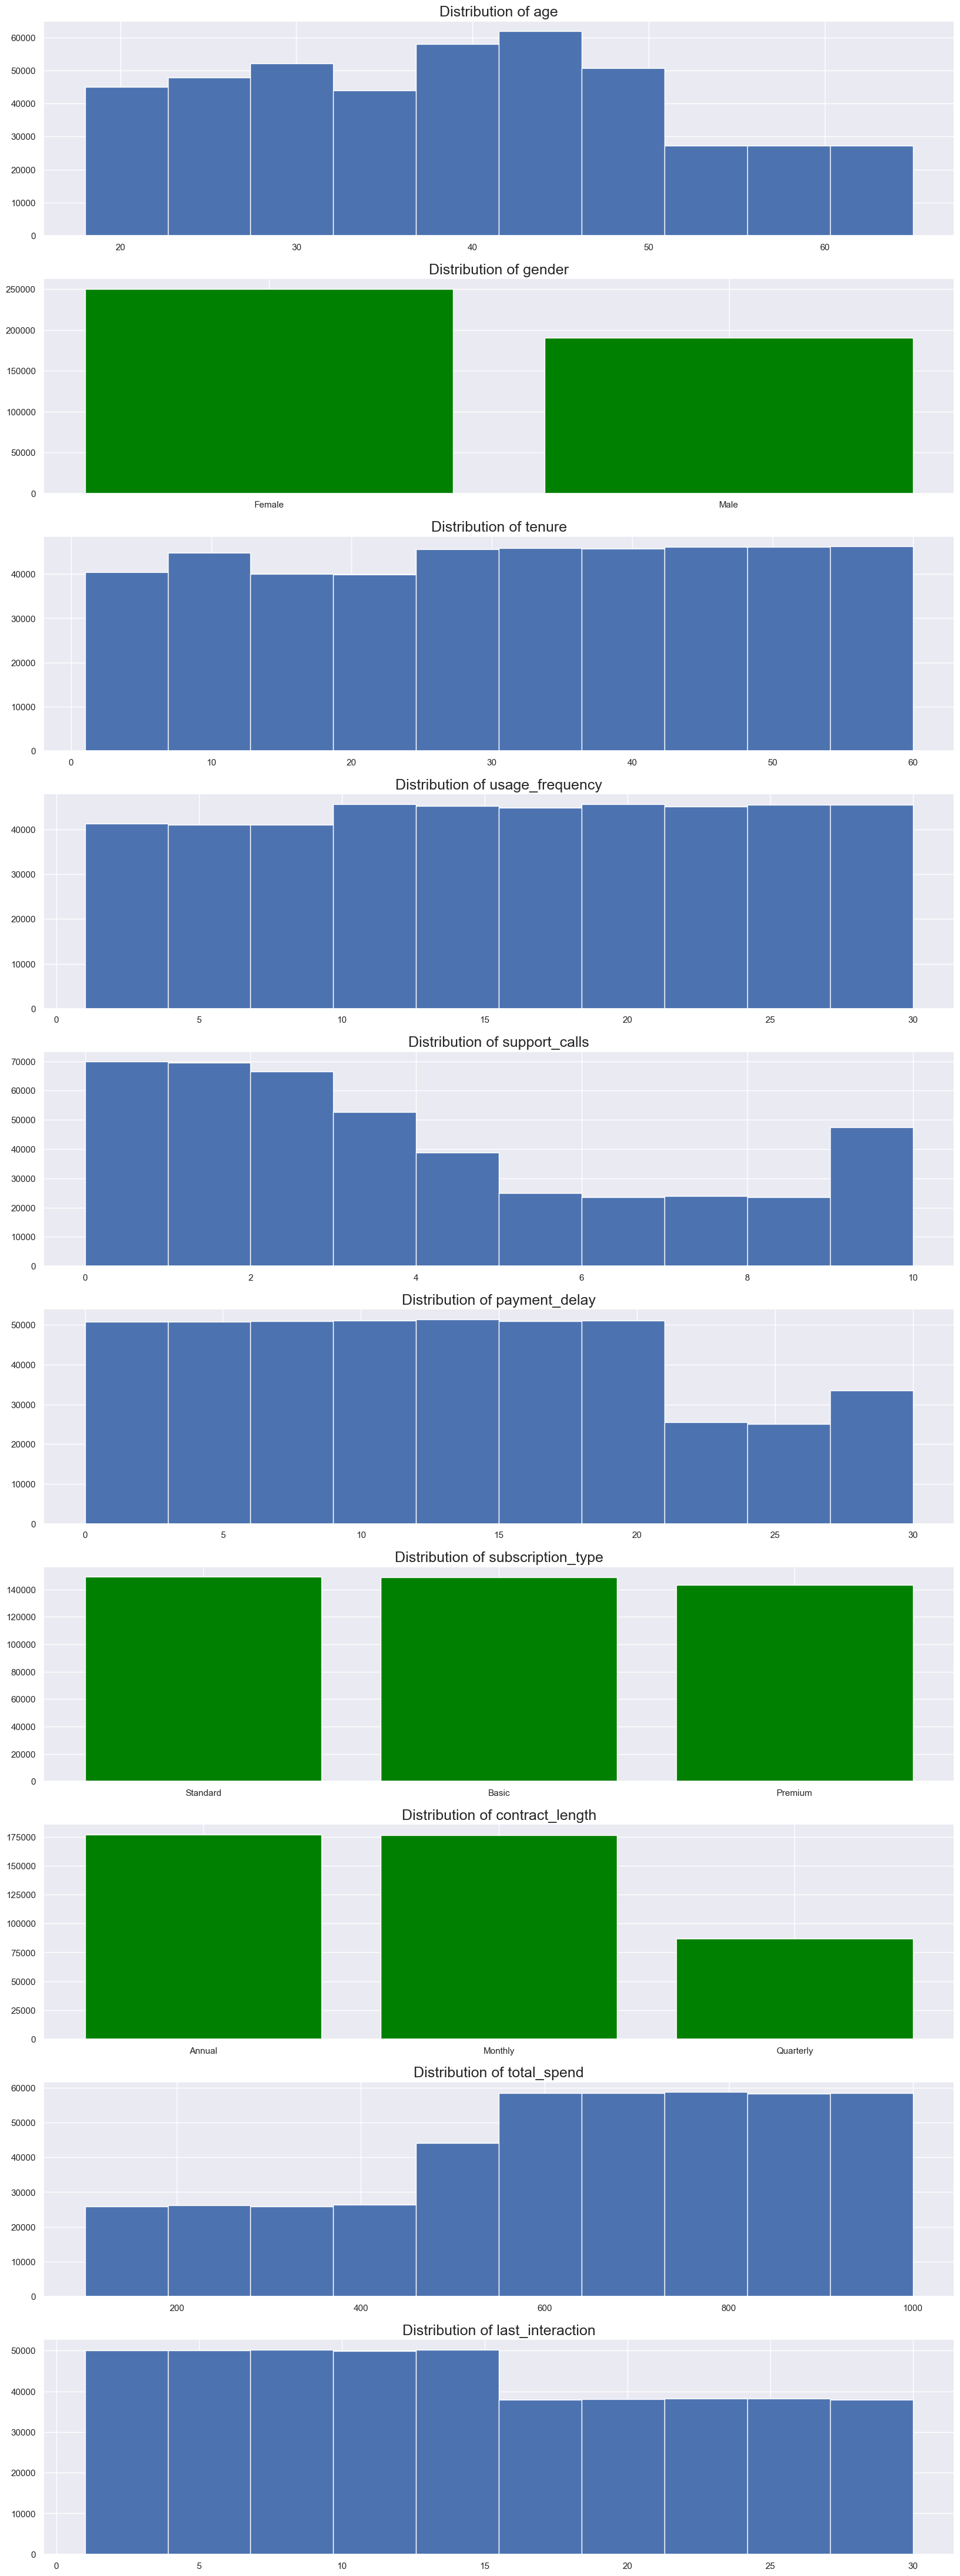

In [117]:
fig, ax = plt.subplots(features.shape[1], 1, figsize=(20, 56))

num_features = [
    feature for feature in features.columns if features[feature].dtype != "object"]

for i, feature in enumerate(features.columns):
    if feature in num_features:
        ax[i].hist(features[feature], bins=10)
    else:
        ax[i].bar(features[feature].unique(),
                  features[feature].value_counts(), color="green")

    ax[i].set_title(f"Distribution of {feature}", fontsize=18)

# Presentation Visuals

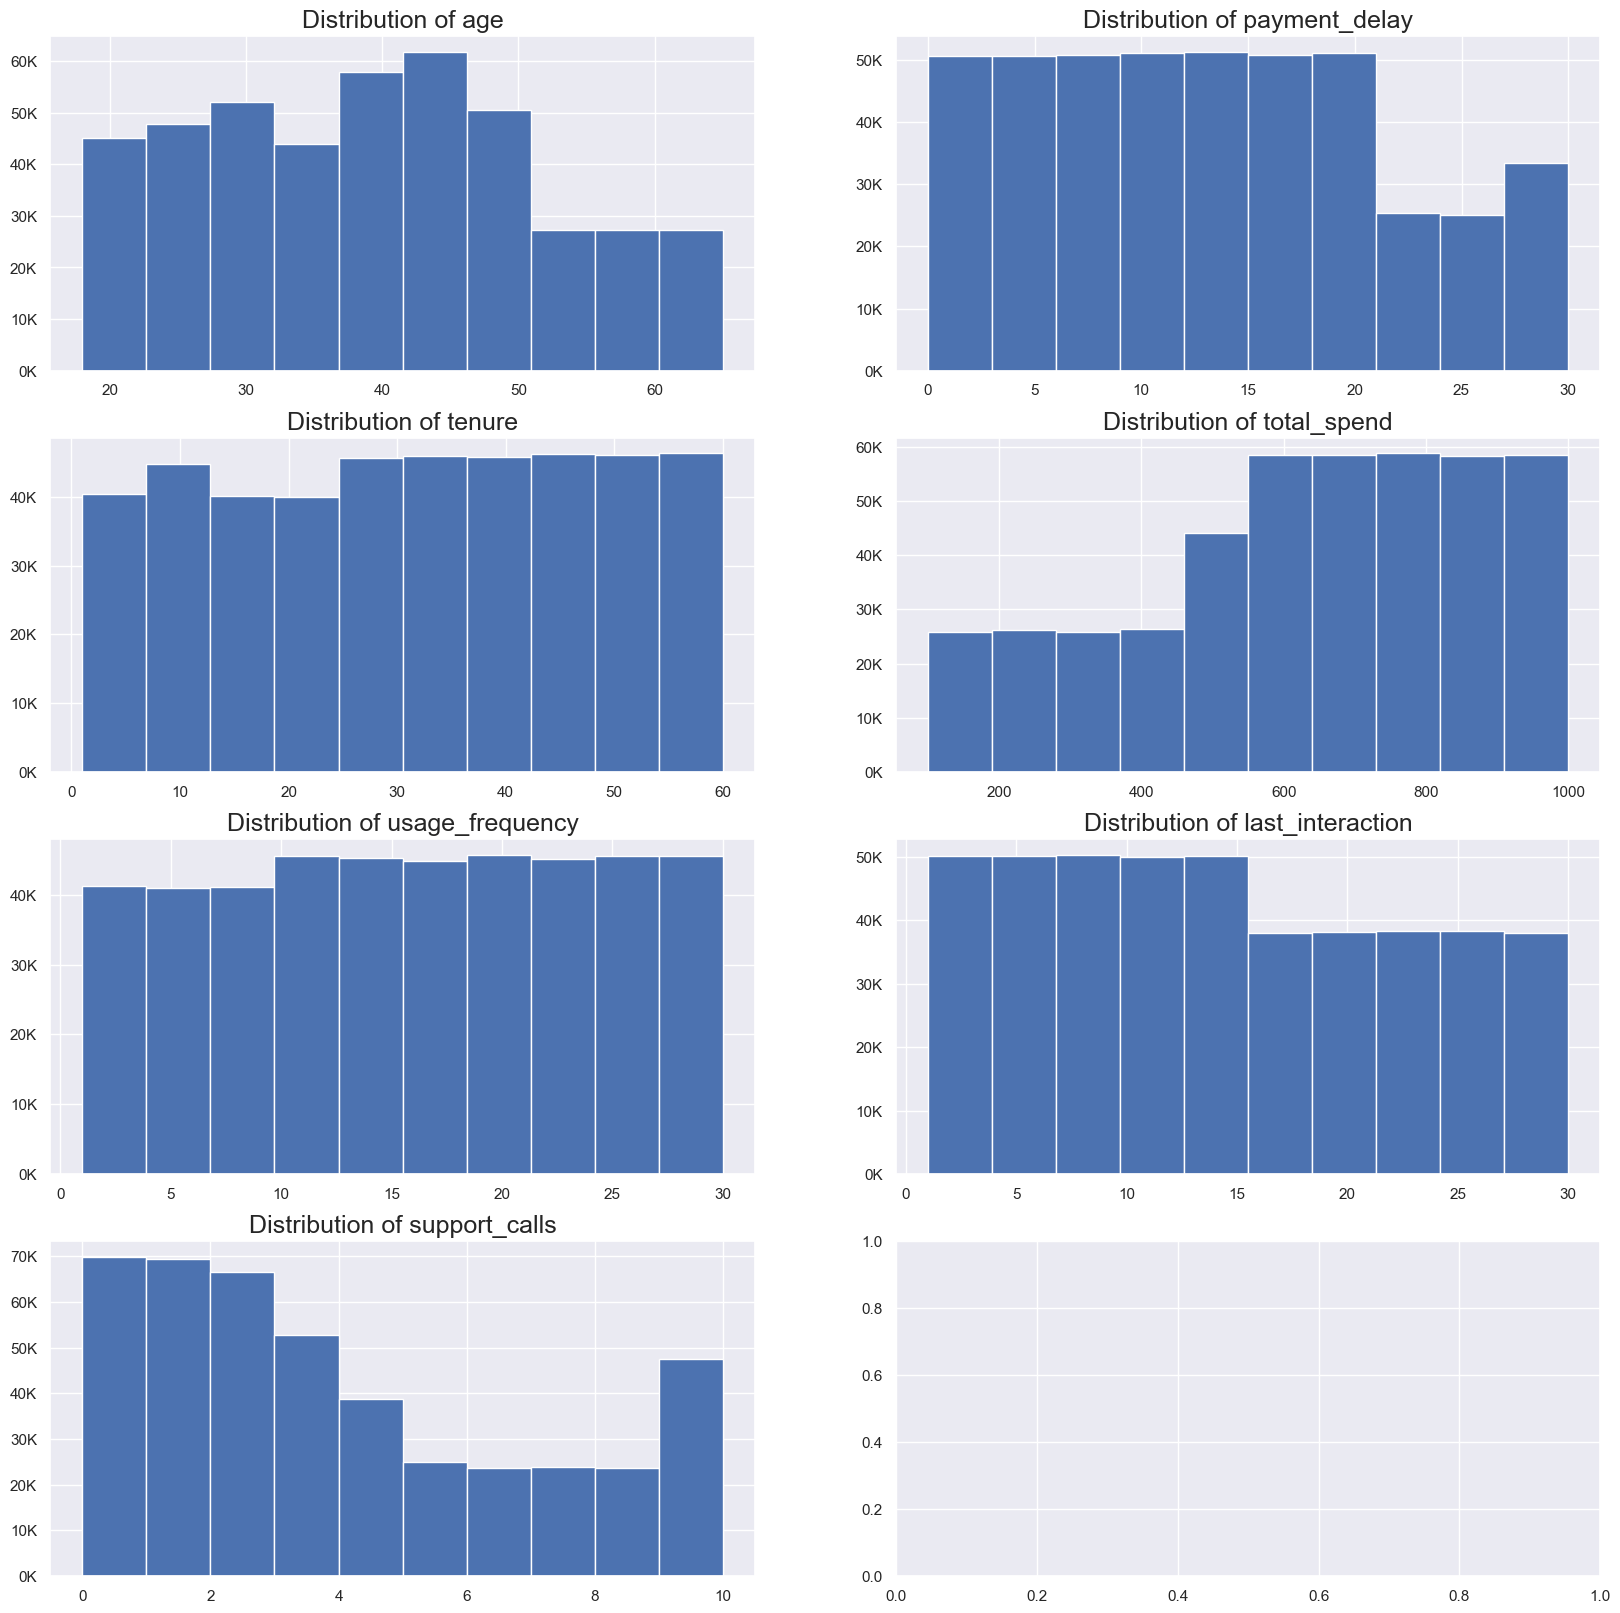

In [118]:
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

formatter = FuncFormatter(thousands_formatter)

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i, feature in enumerate(num_features):
    if i < 4:
        ax[i, 0].hist(features[feature], bins=10)
        ax[i, 0].set_title(f"Distribution of {feature}", fontsize=18)
        ax[i, 0].yaxis.set_major_formatter(formatter)
    else:
        ax[i-4, 1].hist(features[feature], bins=10)
        ax[i-4, 1].set_title(f"Distribution of {feature}", fontsize=18)
        ax[i-4, 1].yaxis.set_major_formatter(formatter)

/var/folders/29/b1zgt_4148qbjk0pt48_ybym0000gn/T/ipykernel_47322/3501157550.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(features[feature].unique(), fontsize=12)
/var/folders/29/b1zgt_4148qbjk0pt48_ybym0000gn/T/ipykernel_47322/3501157550.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(features[feature].unique(), fontsize=12)
/var/folders/29/b1zgt_4148qbjk0pt48_ybym0000gn/T/ipykernel_47322/3501157550.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(features[feature].unique(), fontsize=12)


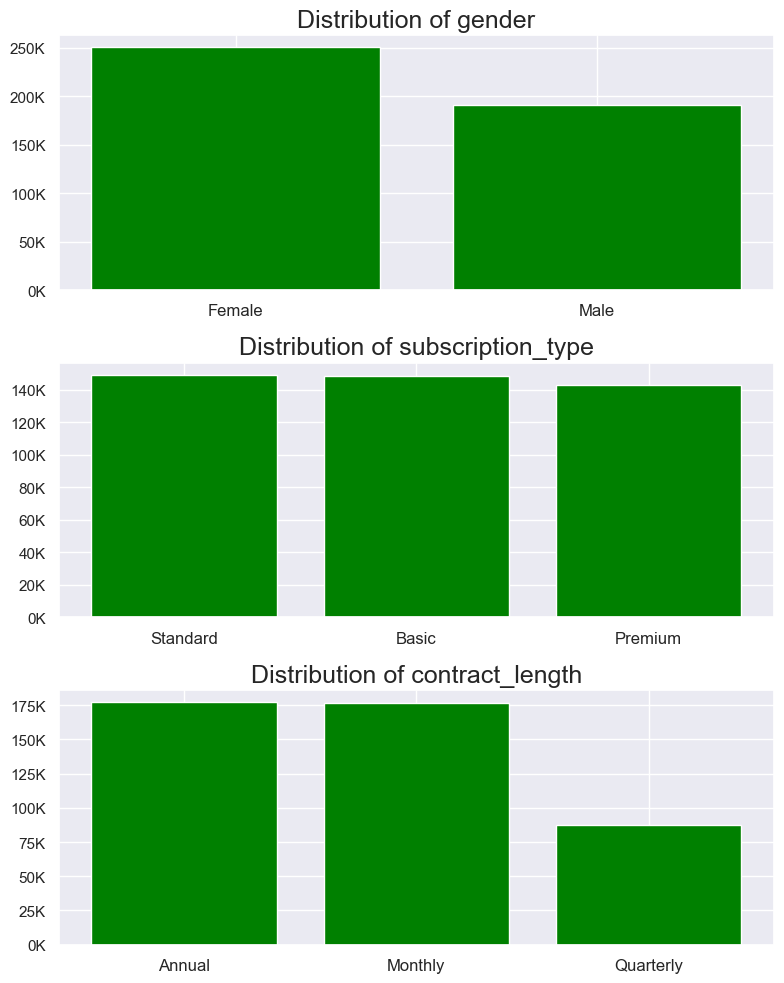

In [119]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

cat_features = [
    feature for feature in features.columns if feature not in num_features]

for i, feature in enumerate(cat_features):

	ax[i].bar(features[feature].unique(),
                  features[feature].value_counts(), color="green")
	
	ax[i].set_title(f"Distribution of {feature}", fontsize=18)
	ax[i].set_xticklabels(features[feature].unique(), fontsize=12)
	ax[i].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [120]:
training_data.describe()

,customerid,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


/opt/anaconda3/envs/usd_ai/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


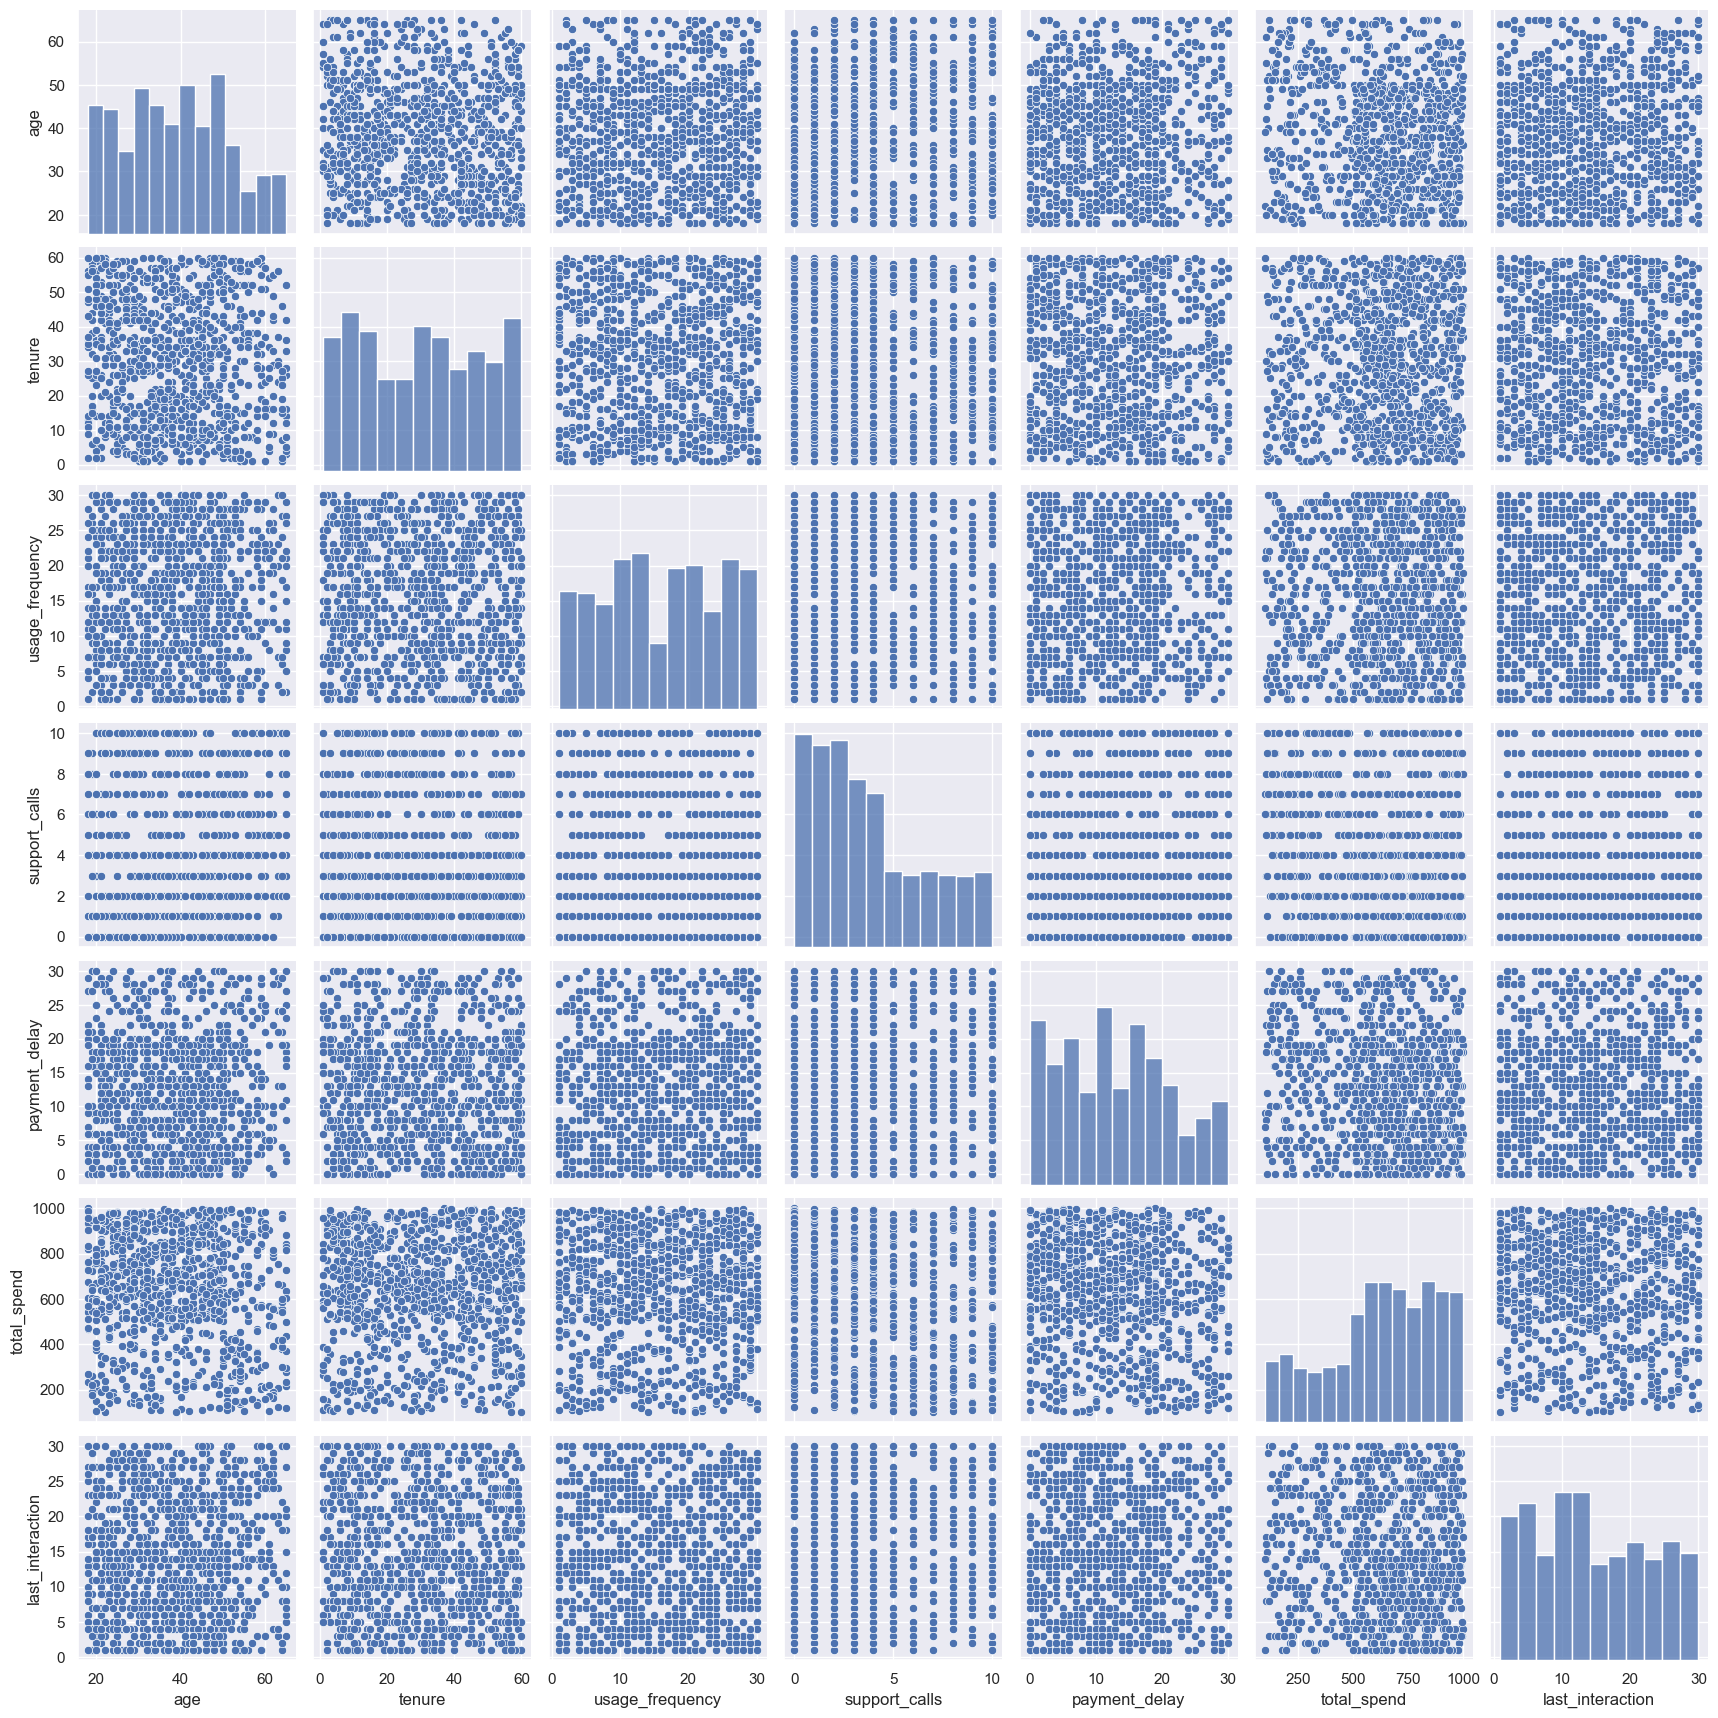

In [121]:
# correlation plot
sb.pairplot(training_data[num_features].sample(1000))

# Preprocessing

In [122]:
# encoding categorical features
es_features = features.copy()
es_test_features = test_features.copy()
label_encoders = []

for feature in es_features:
    if es_features[feature].dtype == "O":
        print(f"Encoding: {feature}")
        le = LabelEncoder()
        
		# fitting encoder on training data
        es_features[feature] = le.fit_transform(es_features[feature])
        
		# applying encoder to test data
        es_test_features[feature] = le.transform(es_test_features[feature])
        label_encoders.append(le)

# scaling numerical features
scaler = RobustScaler()

# fitting scaler on training data
es_features[features.dtypes[features.dtypes != "object"].index] = scaler.fit_transform(
    es_features[features.dtypes[features.dtypes != "object"].index])

# applying scaler to test data
es_test_features[features.dtypes[features.dtypes != "object"].index] = scaler.transform(
    es_test_features[features.dtypes[features.dtypes != "object"].index])

Encoding: gender
Encoding: subscription_type
Encoding: contract_length


In [123]:
es_features.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,-0.473684,0,0.233333,-0.142857,0.4,0.461538,2,0,0.774286,0.200000
1,1.368421,0,0.566667,-1.071429,1.4,-0.307692,0,1,-0.297143,-0.533333
2,0.842105,0,-0.600000,-0.857143,0.6,0.461538,0,2,-1.360000,-0.733333
3,1.000000,1,0.200000,0.357143,0.8,-0.384615,2,1,-0.757143,1.000000
4,-0.842105,1,0.000000,0.285714,0.4,-0.307692,0,1,-0.125714,0.400000


# Basic Modeling

In [192]:
# reducing dimensionality
pca = PCA(2, random_state=39)
dr_features = pca.fit_transform(es_features)
dr_test_features = pca.transform(es_test_features)

In [193]:
# Fitting Random Forest Classifier
param_dist = {
    'max_depth': stats.randint(1, 200),
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 10)}

rfc = RandomForestClassifier(
    random_state=3,
    criterion='entropy',
    warm_start=False,
    n_estimators=100,
    class_weight="balanced")

rand_search = RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)

rand_search.fit(dr_features, target)

print('Best hyperparameters:',  rand_search.best_params_)
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(dr_test_features)

Best hyperparameters: {'max_depth': 26, 'min_samples_leaf': 9, 'min_samples_split': 9}


In [194]:
# pca 2
print(f"accuracy score: {metrics.accuracy_score(test_target, y_pred)}")
print(f"precision score: {metrics.precision_score(test_target, y_pred)}")
print(f"recall score: {metrics.recall_score(test_target, y_pred)}")
print(f"f1 score: {metrics.f1_score(test_target, y_pred)}")
print(f"roc auc score: {metrics.roc_auc_score(test_target, y_pred)}")

accuracy score: 0.5823779786870475
precision score: 0.5332522527502902
recall score: 0.949004689600892
f1 score: 0.6828220858895706
roc auc score: 0.6007087731821348


PCA 2:
accuracy score: 0.5823779786870475   
precision score: 0.5332522527502902   
recall score: 0.949004689600892    
f1 score: 0.6828220858895706   
roc auc score: 0.6007087731821348   


PCA 3:
accuracy score: 0.5768633299158045   
precision score: 0.5296346216895559   
recall score: 0.9535959072574033   
f1 score: 0.6810234791264126   
roc auc score: 0.595699402818513   



PCA 4:
accuracy score: 0.562400969335446   
precision score: 0.5207711153632933   
recall score: 0.955006066966189   
f1 score: 0.6740036106096375   
roc auc score: 0.5820306448286864   

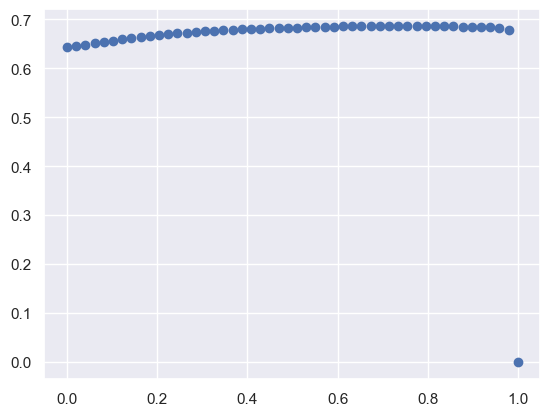

In [ ]:
# optimizing probability cutoff to improve predictions
points = []

space = np.linspace(0, 1, 50)
for i in space:
	y_ppr = (best_rf.predict_proba(dr_test_features) > i)[:, 1]

	points.append(metrics.f1_score(test_target, y_ppr))

fig, ax = plt.subplots()
ax.scatter(space, points)

plt.show()

In [ ]:
# Improved scores after adjusting probability cutoff
opt_prob = space[np.array(points).argmax()]

y_pred_pr = (best_rf.predict_proba(dr_test_features) > opt_prob)[:, 1]

print(f"accuracy score: {metrics.accuracy_score(test_target, y_pred_pr)}")
print(f"precision score: {metrics.precision_score(test_target, y_pred_pr)}")
print(f"recall score: {metrics.recall_score(test_target, y_pred_pr)}")
print(f"f1 score: {metrics.f1_score(test_target, y_pred_pr)}")
print(f"roc auc score: {metrics.roc_auc_score(test_target, y_pred_pr)}")

accuracy score: 0.6087084847919968
precision score: 0.5532017332691381
recall score: 0.9043387006854032
f1 score: 0.6864739049800227
roc auc score: 0.6234895593093791


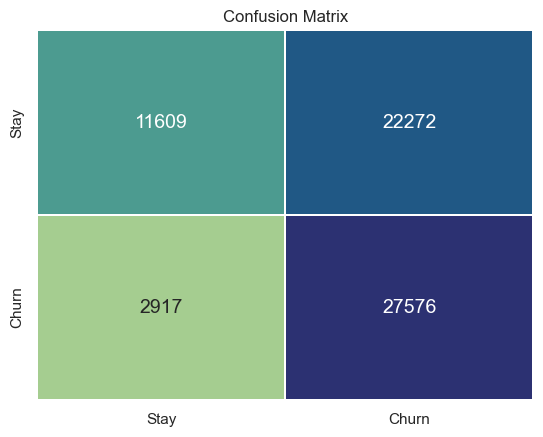

In [197]:
# heatmap of confusion matrix
sb.heatmap(metrics.confusion_matrix(test_target, y_pred_pr),
           linecolor="white",
           linewidths=0.1,
           annot=True,
           annot_kws={"size": 14},
           fmt='.0f',
           cmap="crest",
           cbar=False,
           xticklabels=["Stay", "Churn"],
           yticklabels=["Stay", "Churn"]
		   )

plt.title("Confusion Matrix")
plt.show()

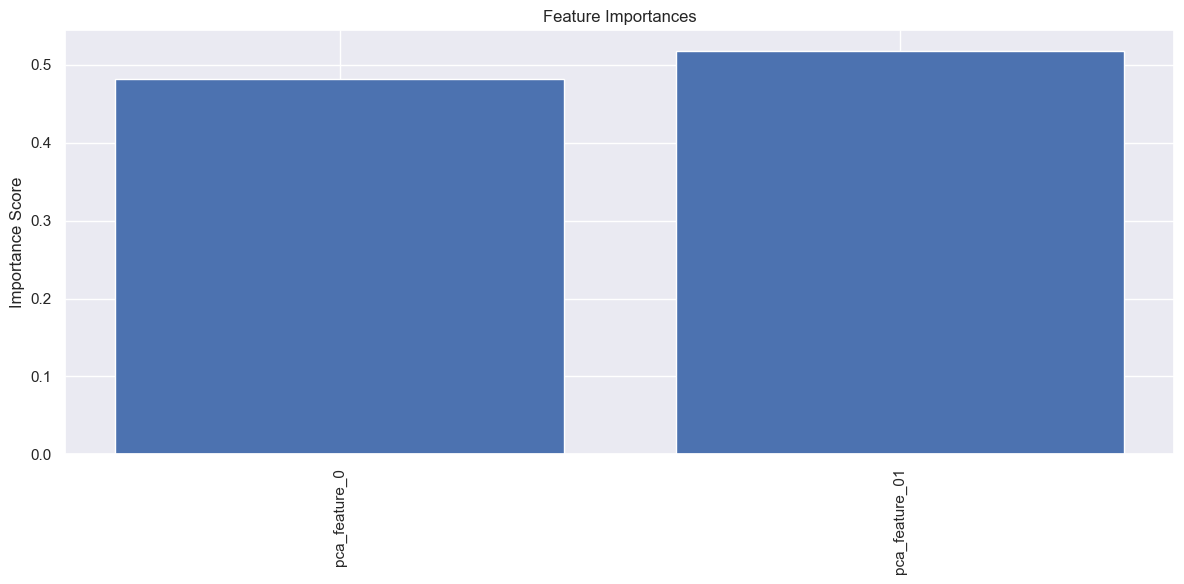

In [198]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(["pca_feature_0", "pca_feature_01"], best_rf.feature_importances_)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title("Feature Importances")
ax.set_ylabel("Importance Score")

plt.tight_layout()
plt.show()